<a href="https://colab.research.google.com/github/Suhail1263/park/blob/main/Parkinsons_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df = pd.read_csv('parkinsons.data')


In [ ]:
df.head()


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),status
0,phon_R01_S01_1,119.992,157.302,74.997,1
1,phon_R01_S01_2,122.400,148.650,113.819,1
2,phon_R01_S01_3,116.682,131.111,111.555,1
3,phon_R01_S01_4,116.676,137.871,111.366,1
4,phon_R01_S01_5,116.014,141.781,110.655,1


In [ ]:
df.columns


Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'status'], dtype='object')

In [ ]:
df.describe()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),status
count,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.753846
std,41.390065,91.491548,43.521413,0.431878
min,88.333000,102.145000,65.476000,0.000000
25%,117.572000,134.862500,84.291000,1.000000
50%,148.790000,175.829000,104.315000,1.000000
75%,182.769000,224.205500,140.018500,1.000000
max,260.105000,592.030000,239.170000,1.000000


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          195 non-null    object 
 1   MDVP:Fo(Hz)   195 non-null    float64
 2   MDVP:Fhi(Hz)  195 non-null    float64
 3   MDVP:Flo(Hz)  195 non-null    float64
 4   status        195 non-null    int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 7.7+ KB


In [ ]:
df.isnull().sum()


name            0
MDVP:Fo(Hz)     0
MDVP:Fhi(Hz)    0
MDVP:Flo(Hz)    0
status          0
dtype: int64

In [ ]:
df.shape


(195, 5)

In [ ]:
df['status'].value_counts()


1    147
0     48
Name: status, dtype: int64

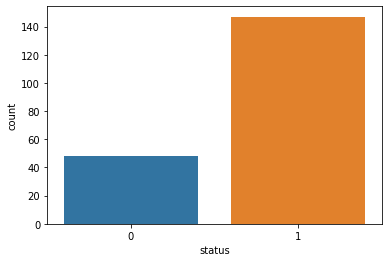

In [ ]:
import seaborn as sns
sns.countplot(df['status'])

In [ ]:
df.dtypes


name             object
MDVP:Fo(Hz)     float64
MDVP:Fhi(Hz)    float64
MDVP:Flo(Hz)    float64
status            int64
dtype: object

In [ ]:
X = df.drop(['name'], 1)
X = X.drop(['status'], 1)
y = df['status']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier().fit(X_train, y_train)


In [ ]:
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score


In [ ]:
accuracy_score(y_test, predictions)


0.7692307692307693

In [ ]:
f1_score(y_test, predictions)


0.8474576271186441

In [ ]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction.sav', 'wb') as f:
    pickle.dump(model,f)
    
with open('standardScalar.sav', 'wb') as f:
    pickle.dump(sc,f)
